In [180]:
import pandas as pd
import numpy as np
import csv,os,sys,time
import matplotlib.pyplot as plt
import datetime,utm
import seaborn as sns 
###测试

import matplotlib.cm as cm
import operator as o
import matplotlib

## 前期库函数准备 之后不再放置
import csv,os,numpy
import numpy as np
import matplotlib.mlab as ml
from matplotlib.tri import Triangulation, UniformTriRefiner
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as colors
from matplotlib.patches import Polygon
import gdal
import matplotlib.cm as cm
import math
import scipy
from matplotlib.collections import PolyCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.collections import PatchCollection

%matplotlib inline
## Add Colorbar
from mpl_toolkits.basemap import Basemap, shiftgrid, cm

f1 = pd.read_csv("../conc/doc/true/2014真值整合表_1月.csv") 
f2 = pd.read_csv("../conc/doc/true/2014真值整合表_4月.csv") 
f3 = pd.read_csv("../conc/doc/true/2014真值整合表_7月.csv") 
f4 = pd.read_csv("../conc/doc/true/2014真值整合表_10月.csv")
xc1,xc2,yc1,yc2 = 113.49805889531724,115.5030664238035,37.39995194888143,38.789235929357105

### 1. 数据前处理

In [2]:
## R
def p_corr(df1, df2):
    """
    Computes Pearson correlation and its significance (using a t
    distribution) on a pandas.DataFrame.
 
    Ignores null values when computing significance. Based on
    http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient#Testing_using_Student.27s_t-distribution
 
    Args:
        df1 (pandas.DataFrame): one dataset
        df2 (pandas.DataFrame): another dataset
 
    Returns:
        corr (float): correlation between the two datasets
        t (float): an associated t-value
        p (float): one-tailed p-value that the two datasets differ
    """
    corr = df1.corr(df2)
    N = np.sum(df1.notnull())
    t = corr*np.sqrt((N-2)/(1-corr**2))
    p = 1-scipy.stats.t.cdf(abs(t),N-2)  # one-tailed
    return corr, t, p

# p_corr(dsite["GX"],dsite["HG"])
def R_corr(list1,list2):
    "皮尔森相关系数"
    r = list1.corr(list2);
    return r;

## NME
def nme(list1,list2):
    "平均标准误差"
    dif,sdif,sigma=0.0,0.0,0.0;
    for i in range(0,len(list1),1):
        dif   = abs(list1.iloc[i] - list2.iloc[i] )
        sdif  = sdif  + dif
        sigma = sigma + list2.iloc[i] 
    NME = sdif/sigma*100.0;
    return NME;

## RMSE
def rmse(list1,list2):
    "平均标准误差"
    dif,sdif =0.0,0.0;
    for i in range(0,len(list1),1):
        dif   = (list1.iloc[i] - list2.iloc[i] )**2
        sdif  = sdif  + dif
    RMSE = (sdif/len(list1))**0.5;
    return RMSE; 

In [23]:
### 受体点日均浓度值
df1 = pd.read_csv("./data/2km_data/10/so2_10_2km.dat",sep="\ ",header=None)
df2 = pd.read_csv("./data/2km_data/10/nox_10_2km.dat",sep="\ ",header=None)
df1.columns = ["year","day","hour","hg_so2","zg_so2","rm_so2","gx_so2","xb_so2","xn_so2","sj_so2"]
df2.columns = ["year","day","hour","hg_no2","zg_no2","rm_no2","gx_no2","xb_no2","xn_no2","sj_no2"]

dfd ={"hg_so2": [],"hg_no2": [],
        "rm_so2": [],"rm_no2": [],
        "gx_so2": [],"gx_no2": [],
        "zg_so2": [],"zg_no2": [],
        "xb_so2": [],"xb_no2": [],
        "xn_so2": [],"xn_no2": [],
        "sj_so2": [],"sj_no2": [],
        "so2_ave":[],"no2_ave":[],}
for i in range(0,len(df1["hg_so2"]),24):
    ### hg 化工学校
    dfd["hg_so2"].append(df1["hg_so2"][i:i+24].mean())
    dfd["hg_no2"].append(df2["hg_no2"][i:i+24].mean())
    ### zg 职工学校
    dfd["zg_so2"].append(df1["zg_so2"][i:i+24].mean())
    dfd["zg_no2"].append(df2["zg_no2"][i:i+24].mean())
    ### rm 人民会堂
    dfd["rm_so2"].append(df1["rm_so2"][i:i+24].mean())
    dfd["rm_no2"].append(df2["rm_no2"][i:i+24].mean())
    ### gx 高新区
    dfd["gx_so2"].append(df1["gx_so2"][i:i+24].mean())
    dfd["gx_no2"].append(df2["gx_no2"][i:i+24].mean())
    ### xb 西北水源
    dfd["xb_so2"].append(df1["xb_so2"][i:i+24].mean())
    dfd["xb_no2"].append(df2["xb_no2"][i:i+24].mean())
    ### xn 西南高教
    dfd["xn_so2"].append(df1["xn_so2"][i:i+24].mean())
    dfd["xn_no2"].append(df2["xn_no2"][i:i+24].mean())
    ### sj 世纪公园
    dfd["sj_so2"].append(df1["sj_so2"][i:i+24].mean())
    dfd["sj_no2"].append(df2["sj_no2"][i:i+24].mean())
for i in range(0,len(dfd["sj_so2"]),1):
    dfd["so2_ave"].append(np.average([dfd["hg_so2"][i],dfd["zg_so2"][i],dfd["rm_so2"][i],
                                     dfd["gx_so2"][i],dfd["xb_so2"][i],dfd["xn_so2"][i],
                                     dfd["sj_so2"][i]]))
    dfd["no2_ave"].append(np.average([dfd["hg_no2"][i],dfd["zg_no2"][i],dfd["rm_no2"][i],
                                     dfd["gx_no2"][i],dfd["xb_no2"][i],dfd["xn_no2"][i],
                                     dfd["sj_no2"][i]]))
s4 = pd.DataFrame(dfd)
s4.to_csv("./data/观测位点浓度日均/10月模拟值-2km分辨率.csv",index = False)

In [26]:
print (s4.hg_so2.corr(f4.hg_so2[1:]))
print (s4.gx_so2.corr(f4.gx_so2[1:]))
print (s4.rm_so2.corr(f4.rm_so2[1:]))
print (s4.xb_so2.corr(f4.xb_so2[1:]))
print (s4.xn_so2.corr(f4.xn_so2[1:]))
print (s4.sj_so2.corr(f4.sj_so2[1:]))
print (s4.zg_so2.corr(f4.zg_so2[1:]))

-0.0179099298488
-0.0456302461707
0.0621827979739
0.230428797979
0.213915469375
0.0637567795436
-0.0663658538404


In [ ]:
### 1,4,7,10
### 数据预备打理
os.chdir('/Users/HYF/Documents/SJZ/site/data/2km_data/1/no2_grid/')

## 定义特定行删除
FIRST_ROW_NUM = 1  # or 0
ROWS_TO_DELETE = {1,2,3,4,5,7}

## 循环遍历
files = os.listdir('.')
for file in files:
    filename,extname = os.path.splitext(file)
    if (len(file) == 48):
        outname = "no2_%s-%s-%s-%s.csv" % (filename[0:4],filename[6:8],filename[10:12],filename[13:15])
        inputname = filename + extname
        with open(inputname,"rt") as infile, open(outname,'wt') as outfile:
            outfile.writelines(row for row_num, row in enumerate(infile, FIRST_ROW_NUM)
                               if row_num not in ROWS_TO_DELETE)
            
!rm -f 2014_*

### 2.  浓度图绘制

In [52]:
## 14:48之前完成不需脑子的工作
### 1月
sim_s_1 = pd.concat([s1.gx_so2,s1.hg_so2,s1.xb_so2,s1.hg_so2,s1.xb_so2,s1.sj_so2,s1.rm_so2])
obs_s_1 = pd.concat([f1.gx_so2[1:-1],f1.hg_so2[1:-1],f1.xb_so2[1:-1],f1.hg_so2[1:-1],f1.xb_so2[1:-1],
                f1.sj_so2[1:-1],f1.rm_so2[1:-1]])
### 4月
sim_s_2 = pd.concat([s2.gx_so2,s2.hg_so2,s2.xb_so2,s2.hg_so2,s2.xb_so2,s2.sj_so2,s2.rm_so2])
obs_s_2 = pd.concat([f2.gx_so2[1:],f2.hg_so2[1:],f2.xb_so2[1:],f2.hg_so2[1:],f2.xb_so2[1:],
                f2.sj_so2[1:],f2.rm_so2[1:]])
### 7月
sim_s_3 = pd.concat([s3.gx_so2,s3.hg_so2,s3.xb_so2,s3.hg_so2,s3.xb_so2,s3.sj_so2,s3.rm_so2])
obs_s_3 = pd.concat([f3.gx_so2[1:],f3.hg_so2[1:],f3.xb_so2[1:],f3.hg_so2[1:],f3.xb_so2[1:],
                f3.sj_so2[1:],f3.rm_so2[1:]])

### 10月
sim_s_4 = pd.concat([s4.gx_so2,s4.hg_so2,s4.xb_so2,s4.hg_so2,s4.xb_so2,s4.sj_so2,s4.rm_so2])
obs_s_4 = pd.concat([f4.gx_so2[1:],f4.hg_so2[1:],f4.xb_so2[1:],f4.hg_so2[1:],f4.xb_so2[1:],
                f4.sj_so2[1:],f4.rm_so2[1:]])

### 1月
sim_n_1 = pd.concat([s1.gx_no2,s1.hg_no2,s1.xb_no2,s1.hg_no2,s1.xb_no2,s1.sj_no2,s1.rm_no2])
obs_n_1 = pd.concat([f1.gx_no2[1:-1],f1.hg_no2[1:-1],f1.xb_no2[1:-1],f1.hg_no2[1:-1],f1.xb_no2[1:-1],
                f1.sj_no2[1:-1],f1.rm_no2[1:-1]])
### 4月
sim_n_2 = pd.concat([s2.gx_no2,s2.hg_no2,s2.xb_no2,s2.hg_no2,s2.xb_no2,s2.sj_no2,s2.rm_no2])
obs_n_2 = pd.concat([f2.gx_no2[1:],f2.hg_no2[1:],f2.xb_no2[1:],f2.hg_no2[1:],f2.xb_no2[1:],
                f2.sj_no2[1:],f2.rm_no2[1:]])
### 7月
sim_n_3 = pd.concat([s3.gx_no2,s3.hg_no2,s3.xb_no2,s3.hg_no2,s3.xb_no2,s3.sj_no2,s3.rm_no2])
obs_n_3 = pd.concat([f3.gx_no2[1:],f3.hg_no2[1:],f3.xb_no2[1:],f3.hg_no2[1:],f3.xb_no2[1:],
                f3.sj_no2[1:],f3.rm_no2[1:]])

### 10月
sim_n_4 = pd.concat([s4.gx_no2,s4.hg_no2,s4.xb_no2,s4.hg_no2,s4.xb_no2,s4.sj_no2,s4.rm_no2])
obs_n_4 = pd.concat([f4.gx_no2[1:],f4.hg_no2[1:],f4.xb_no2[1:],f4.hg_no2[1:],f4.xb_no2[1:],
                f4.sj_no2[1:],f4.rm_no2[1:]])

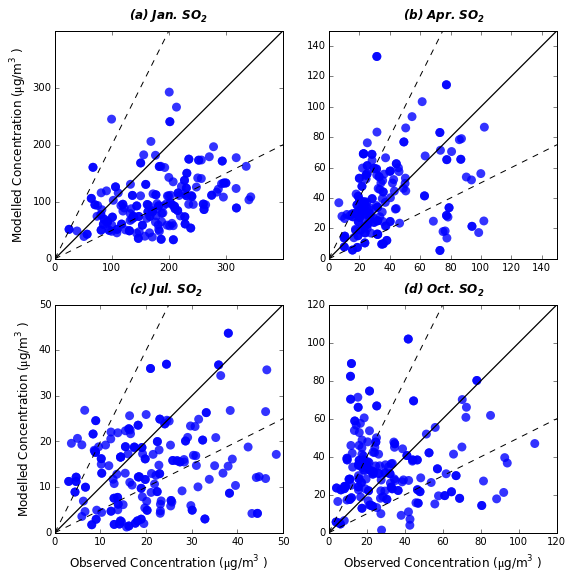

In [62]:
from scipy.stats import gaussian_kde
fig = plt.figure(figsize= (9,9))
ax1 = plt.subplot(221)

# xy = np.vstack([obs_s_1,sim_s_1])
# z = gaussian_kde(xy)(xy)
# idx = z.argsort()
# obs_s_x,sim_s_y,  z = obs_s_1[idx], obs_s_1[idx], z[idx]

ax1.scatter(obs_s_1,sim_s_1,marker = "o" ,s= 80,edgecolor ='',alpha =0.8 )
ax1.set_aspect('equal')
ax1.set_xlim(0,400)
ax1.set_ylim(0,400)
ax1.plot([0, 400], [0, 400], color='k', linestyle='-', linewidth=1.25)
ax1.plot([0, 400], [0, 200], color='k', linestyle='--', linewidth=1)
ax1.plot([0,200], [0, 400], color='k', linestyle='--', linewidth=1)
ax1.set_xticks([0,100,200,300])
ax1.set_yticks([0,100,200,300])
ax1.set_ylabel(r'$\mathregular{Modelled\ Concentration\ (\mu g/m^3)}$',fontsize = 12)
ax1.annotate(r'$\mathregular{(a)\ Jan.\ SO_2}$',xycoords='axes fraction',xy=(0.325, 1.05),fontsize = 12, fontstyle = 'italic',fontweight = 'bold')
###
ax2 = plt.subplot(222)
plt.scatter(obs_s_2,sim_s_2,marker = "o" ,s= 80,edgecolor ='',alpha =0.8 )
ax2.set_aspect('equal')
ax2.set_xlim(0,150)
ax2.set_ylim(0,150)
ax2.plot([0, 400], [0, 400], color='k', linestyle='-', linewidth=1.25)
ax2.plot([0, 400], [0, 200], color='k', linestyle='--', linewidth=1)
ax2.plot([0,200], [0, 400], color='k', linestyle='--', linewidth=1)
ax2.annotate(r'$\mathregular{(b)\ Apr.\ SO_2}$',xycoords='axes fraction',xy=(0.325, 1.05),fontsize = 12, fontstyle = 'italic',fontweight = 'bold')
# ax.set_xticks([0,100,200,300])
# ax.set_yticks([0,100,200,300])
###
ax3 = plt.subplot(223)
plt.scatter(obs_s_3,sim_s_3,marker = "o" ,s= 80,edgecolor ='',alpha =0.8 )
ax3.set_aspect('equal')
ax3.set_xlim(0,50)
ax3.set_ylim(0,50)
ax3.plot([0, 400], [0, 400], color='k', linestyle='-', linewidth=1.25)
ax3.plot([0, 400], [0, 200], color='k', linestyle='--', linewidth=1)
ax3.plot([0,200], [0, 400], color='k', linestyle='--', linewidth=1)
ax3.annotate(r'$\mathregular{(c)\ Jul.\ SO_2}$',xycoords='axes fraction',xy=(0.325, 1.05),fontsize = 12, fontstyle = 'italic',fontweight = 'bold')
# ax.set_xticks([0,100,200,300])
# ax.set_yticks([0,100,200,300])
ax3.set_ylabel(r'$\mathregular{Modelled\ Concentration\ (\mu g/m^3)}$',fontsize = 12)
ax3.set_xlabel(r'$\mathregular{Observed\ Concentration\ (\mu g/m^3)}$',fontsize = 12)

###
ax4 = plt.subplot(224)
plt.scatter(obs_s_4,sim_s_4,marker = "o" ,s= 80,edgecolor ='',alpha =0.8 )
ax4.set_aspect('equal')
ax4.set_xlim(0,120)
ax4.set_ylim(0,120)
ax4.plot([0, 400], [0, 400], color='k', linestyle='-', linewidth=1.25)
ax4.plot([0, 400], [0, 200], color='k', linestyle='--', linewidth=1)
ax4.plot([0,200], [0, 400], color='k', linestyle='--', linewidth=1)
# ax.set_xticks([0,100,200,300])
# ax.set_yticks([0,100,200,300])
ax4.set_xlabel(r'$\mathregular{Observed\ Concentration\ (\mu g/m^3)}$',fontsize = 12)
ax4.annotate(r'$\mathregular{(d)\ Oct.\ SO_2}$',xycoords='axes fraction',xy=(0.325, 1.05),fontsize = 12, fontstyle = 'italic',fontweight = 'bold')

plt.savefig("./pic/0103//模拟-so2浓度-全年.pdf")

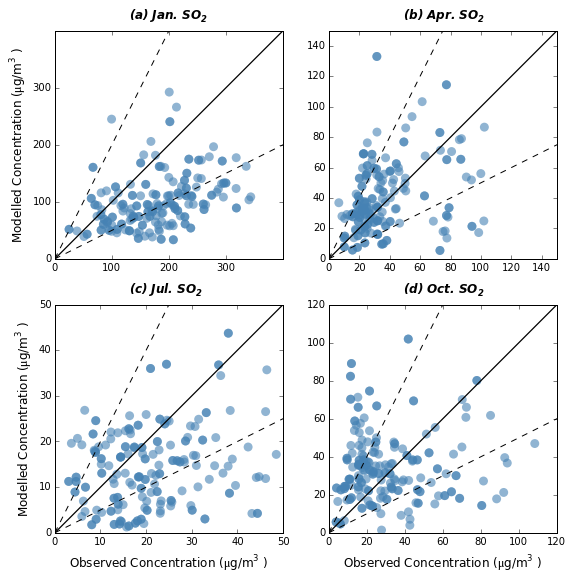

In [119]:
from scipy.stats import gaussian_kde
fig = plt.figure(figsize= (9,9))
ax1 = plt.subplot(221)

# xy = np.vstack([obs_s_1,sim_s_1])
# z = gaussian_kde(xy)(xy)
# idx = z.argsort()
# obs_s_x,sim_s_y,  z = obs_s_1[idx], obs_s_1[idx], z[idx]

ax1.scatter(obs_s_1,sim_s_1,color = 'steelblue',marker = 'o' ,s= 80,edgecolor ='',alpha =0.6 )
ax1.set_aspect('equal')
ax1.set_xlim(0,400)
ax1.set_ylim(0,400)
ax1.plot([0, 400], [0, 400], color='k', linestyle='-', linewidth=1.25)
ax1.plot([0, 400], [0, 200], color='k', linestyle='--', linewidth=1)
ax1.plot([0,200], [0, 400], color='k', linestyle='--', linewidth=1)
ax1.set_xticks([0,100,200,300])
ax1.set_yticks([0,100,200,300])
ax1.set_ylabel(r'$\mathregular{Modelled\ Concentration\ (\mu g/m^3)}$',fontsize = 12)
ax1.annotate(r'$\mathregular{(a)\ Jan.\ SO_2}$',xycoords='axes fraction',xy=(0.325, 1.05),fontsize = 12, fontstyle = 'italic',fontweight = 'bold')
###
ax2 = plt.subplot(222)
plt.scatter(obs_s_2,sim_s_2,color = 'steelblue',marker = 'o' ,s= 80,edgecolor ='',alpha =0.6 )
ax2.set_aspect('equal')
ax2.set_xlim(0,150)
ax2.set_ylim(0,150)
ax2.plot([0, 400], [0, 400], color='k', linestyle='-', linewidth=1.25)
ax2.plot([0, 400], [0, 200], color='k', linestyle='--', linewidth=1)
ax2.plot([0,200], [0, 400], color='k', linestyle='--', linewidth=1)
ax2.annotate(r'$\mathregular{(b)\ Apr.\ SO_2}$',xycoords='axes fraction',xy=(0.325, 1.05),fontsize = 12, fontstyle = 'italic',fontweight = 'bold')
# ax.set_xticks([0,100,200,300])
# ax.set_yticks([0,100,200,300])
###
ax3 = plt.subplot(223)
plt.scatter(obs_s_3,sim_s_3,color = 'steelblue',marker = 'o' ,s= 80,edgecolor ='',alpha =0.6 )
ax3.set_aspect('equal')
ax3.set_xlim(0,50)
ax3.set_ylim(0,50)
ax3.plot([0, 400], [0, 400], color='k', linestyle='-', linewidth=1.25)
ax3.plot([0, 400], [0, 200], color='k', linestyle='--', linewidth=1)
ax3.plot([0,200], [0, 400], color='k', linestyle='--', linewidth=1)
ax3.annotate(r'$\mathregular{(c)\ Jul.\ SO_2}$',xycoords='axes fraction',xy=(0.325, 1.05),fontsize = 12, fontstyle = 'italic',fontweight = 'bold')
# ax.set_xticks([0,100,200,300])
# ax.set_yticks([0,100,200,300])
ax3.set_ylabel(r'$\mathregular{Modelled\ Concentration\ (\mu g/m^3)}$',fontsize = 12)
ax3.set_xlabel(r'$\mathregular{Observed\ Concentration\ (\mu g/m^3)}$',fontsize = 12)

###
ax4 = plt.subplot(224)
plt.scatter(obs_s_4,sim_s_4,color = 'steelblue',marker = 'o' ,s= 80,edgecolor ='',alpha =0.6 )
ax4.set_aspect('equal')
ax4.set_xlim(0,120)
ax4.set_ylim(0,120)
ax4.plot([0, 400], [0, 400], color='k', linestyle='-', linewidth=1.25)
ax4.plot([0, 400], [0, 200], color='k', linestyle='--', linewidth=1)
ax4.plot([0,200], [0, 400], color='k', linestyle='--', linewidth=1)
# ax.set_xticks([0,100,200,300])
# ax.set_yticks([0,100,200,300])
ax4.set_xlabel(r'$\mathregular{Observed\ Concentration\ (\mu g/m^3)}$',fontsize = 12)
ax4.annotate(r'$\mathregular{(d)\ Oct.\ SO_2}$',xycoords='axes fraction',xy=(0.325, 1.05),fontsize = 12, fontstyle = 'italic',fontweight = 'bold')

plt.savefig("./pic/0103/模拟-so2浓度-全年.pdf")

In [88]:
x_grid = np.arange(252,326,2)
y_grid = np.arange(4188,4250,2)

x_map1,y_map1 = utm.to_latlon(x_grid[0]*1000.0-1000.0,y_grid[0]*1000.0-1000.0,50,"N")[1],utm.to_latlon(x_grid[0]*1000.0-1000.0,y_grid[0]*1000.0-1000.0,50,"N")[0]
x_map2,y_map2 = utm.to_latlon(x_grid[-1]*1000.0+1000.0,y_grid[-1]*1000.0+1000.0,50,"N")[1],utm.to_latlon(x_grid[-1]*1000.0+1000.0,y_grid[-1]*1000.0+1000.0,50,"N")[0]

x_s1,y_s1 = utm.to_latlon(x_grid[0]*1000.0,y_grid[0]*1000.0,50,"N")[1],utm.to_latlon(x_grid[0]*1000.0,y_grid[0]*1000.0,50,"N")[0]
x_s2,y_s2 = utm.to_latlon(x_grid[-1]*1000.0,y_grid[-1]*1000.0,50,"N")[1],utm.to_latlon(x_grid[-1]*1000.0,y_grid[-1]*1000.0,50,"N")[0]

### 1. 确定 格点位置
### 高新园区 化工学校 人民会堂 世纪公园 西北水源 西南高教 职工医院
MS_xlon = [114 + 35.0/60.0 + 32/3600.0, 114 + 33/60.0, 114.0+30/60.0+32/3600.0, 114+31/60.0+48/3600.0,114.0+26/60.0+21/3600.0,
          114.0+27/60.0+17/3600.0,114.0+26/60.0+31/3600.0, ]
MS_ylat =  [38.0+1/60.0+59/3600.0,38.0+2/60.0+52/3600.0,38+2/60.0+45/3600.0,38+1/60.0+28/3600.0,38.0+9/60.0+58/3600.0,
          38.0+17/3600.0,38+2/60.0+41/3600.0,]

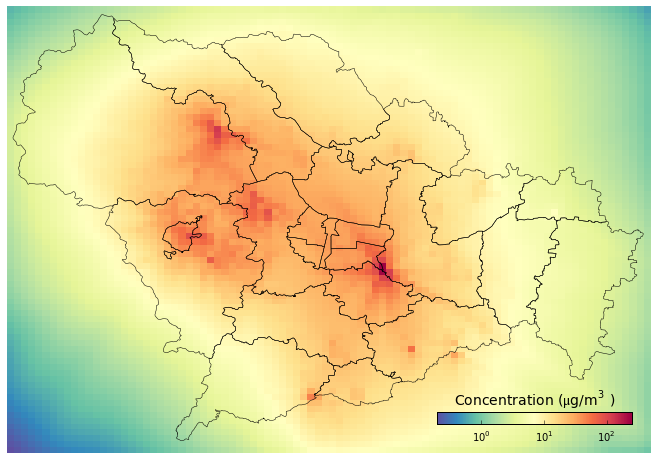

In [115]:
fig=plt.figure(figsize=(12,8))
ax=plt.subplot()
xi,yi = np.linspace(xc1,xc2,91), np.linspace(yc1,yc2,76)
xi, yi = np.meshgrid(xi, yi)
map = Basemap(llcrnrlon=xc1,llcrnrlat=yc1,urcrnrlon=xc2,urcrnrlat=yc2)
map.readshapefile('/Users/HYF/Documents/SJZ/pre/sjz_xin/sjz_xin','sjz_xin',zorder =4)
fst =pd.read_csv("/Users/HYF/Documents/SJZ/site/data/2km_data/10/so2_10_2km_grid.csv")
value_array = fst.VALUE.as_matrix() 
conc = value_array.reshape(75,90)

# ss_mesh = np.ma.masked_less(conc,0)

# cmap1 = plt.cm.get_cmap("Spectral_r",lut=18)
cmap1.set_bad("w")
# level = [10,15,20,25,30,40,45,50,55,60,65,70,75,80,85,90,100]
# k = plt.contourf(xi,yi,conc, cmap = plt.cm.coolwarm,levels= level,alpha =1,zorder =2)
p =plt.pcolor(xi,yi,conc,cmap=plt.cm.Spectral_r,alpha =1,norm=colors.LogNorm(),zorder =2)
# p =plt.pcolor(xi,yi,ss_mesh,cmap =plt.cm.jet,alpha =1,zorder =2)
ax.set_frame_on(False)
cbaxes = fig.add_axes([0.625, 0.175, 0.225, 0.02]) 
cbar = plt.colorbar(p,cax=cbaxes,orientation='horizontal')
cbar.ax.set_xlabel(r'$\mathregular{ Concentration\ (\mu g/m^3)}$',size = 14,labelpad=-55)
fig.subplots_adjust(wspace=0.15, hspace=0.1, left = 0.05,right=0.95)
plt.savefig("./pic/0103//10月so2浓度分布.pdf")

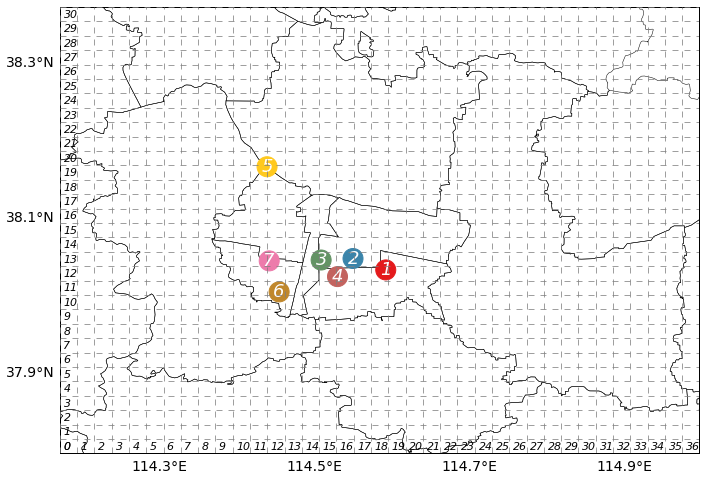

In [123]:
### 新放大图起点
####
x_map1,y_map1 = utm.to_latlon(x_grid[0]*1000.0-1000.0,y_grid[0]*1000.0-1000.0,50,"N")[1],utm.to_latlon(x_grid[0]*1000.0-1000.0,y_grid[0]*1000.0-1000.0,50,"N")[0]
x_map2,y_map2 = utm.to_latlon(x_grid[-1]*1000.0+1000.0,y_grid[-1]*1000.0+1000.0,50,"N")[1],utm.to_latlon(x_grid[-1]*1000.0+1000.0,y_grid[-1]*1000.0+1000.0,50,"N")[0]

x_s1,y_s1 = utm.to_latlon(x_grid[0]*1000.0,y_grid[0]*1000.0,50,"N")[1],utm.to_latlon(x_grid[0]*1000.0,y_grid[0]*1000.0,50,"N")[0]
x_s2,y_s2 = utm.to_latlon(x_grid[-1]*1000.0,y_grid[-1]*1000.0,50,"N")[1],utm.to_latlon(x_grid[-1]*1000.0,y_grid[-1]*1000.0,50,"N")[0]

fig=plt.figure(figsize=(12,8))
ax = plt.gca()
map = Basemap(llcrnrlon=x_map1,llcrnrlat=y_map1,urcrnrlon=x_map2,urcrnrlat=y_map2)
map.drawparallels(np.arange(y_map1+0.1035,y_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0,color= '#FFFFFF')
map.drawmeridians(np.arange(x_map1+0.128,x_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0)
map.readshapefile('/Users/HYF/Documents/SJZ/pre/sjz_xin/sjz_xin','sjz_xin',zorder =1)

cs=plt.cm.Set1(np.arange(7)/7.)
mslon,mslat = map(MS_xlon,MS_ylat)
map.scatter(mslon,mslat,s = 400,marker = "o",color = cs, zorder = 2)
label = ["1","2","3","4","5","6","7"]
for i in range(0,7,1):
    plt.text(mslon[i]-0.0065,mslat[i]-0.0065,str(i+1),size = 18,color = "w",fontstyle = "italic",zorder =2)

# xx,yy = np.meshgrid(lon_grid,lat_grid)
# ter = plt.pcolor(xx,yy,Ht,cmap = plt.cm.terrain,zorder=3,alpha = 0.3)
lon_grid  = np.linspace(x_map1,x_map2,len(x_grid)+1)
lat_grid  = np.linspace(y_map1,y_map2,len(y_grid)+1)
for i in range(0,len(lon_grid),1):
     ax.axvline(x=lon_grid[i], linestyle='--', color='grey', linewidth=0.75,    zorder=4)
for i in range(0,len(lat_grid),1):
     ax.axhline(y=lat_grid[i], linestyle='--', color='grey', linewidth=0.75, zorder=4) 
for i in range(0,len(x_grid),1):
    plt.text(lon_grid[i]+0.005,lat_grid[0]+0.005,str(i),size = 11,color = "k",fontstyle = "italic",zorder =5)
for i in range(0,len(y_grid),1):
    plt.text(lon_grid[0]+0.005,lat_grid[i]+0.005,str(i),size = 11,color = "k",fontstyle = "italic",zorder =5)

In [124]:
### 各站点位置
site1, site2, site3, site4, site5, site6, site7,= [12,18],[13,16],[13,15], [11,15], [19,11],[11,12],[13,12]

In [131]:
### 整体四月份浓度 hack
import timeit
start = timeit.default_timer()

# Month 1
os.chdir("/Users/HYF/Documents/SJZ/site/data/2km_data/1/so2_grid/")
files = os.listdir('.')
for file in files:
    filename,extname = os.path.splitext(file)
    if extname == '.csv':
        f = pd.read_csv(file)
        df = (f.VALUE.as_matrix()).reshape(75,90)
        if file == 'so2_2014-01-02-00.csv':
            ds = df.reshape(1,75,90)
        else:    
            ds = np.vstack([ds,df[None, ...]])
            
# Month 4
os.chdir("/Users/HYF/Documents/SJZ/site/data/2km_data/4/so2_grid//")
files = os.listdir('.')
for file in files:
    filename,extname = os.path.splitext(file)
    if extname == '.csv':
        f = pd.read_csv(file)
        df = (f.VALUE.as_matrix()).reshape(75,90)
        ds = np.vstack([ds,df[None, ...]])
## Month 7       
os.chdir("/Users/HYF/Documents/SJZ/site/data/2km_data/7/so2_grid/")
files = os.listdir('.')
for file in files:
    filename,extname = os.path.splitext(file)
    if extname == '.csv':
        f = pd.read_csv(file)
        df = (f.VALUE.as_matrix()).reshape(75,90)
        ds = np.vstack([ds,df[None, ...]])
        
## Month 10       
os.chdir("/Users/HYF/Documents/SJZ/site/data/2km_data/10/so2_grid/")
files = os.listdir('.')
for file in files:
    filename,extname = os.path.splitext(file)
    if extname == '.csv':
        f = pd.read_csv(file)
        df = (f.VALUE.as_matrix()).reshape(75,90)
        ds = np.vstack([ds,df[None, ...]])
             
stop = timeit.default_timer()
print stop - start
print ds.shape

249.194895983
(2812, 75, 90)


In [135]:
### 整体四月份浓度 hack no2
import timeit
start = timeit.default_timer()

# Month 1
os.chdir("/Users/HYF/Documents/SJZ/site/data/2km_data/1/no2_grid/")
files = os.listdir('.')
for file in files:
    filename,extname = os.path.splitext(file)
    if extname == '.csv':
        f = pd.read_csv(file)
        df = (f.VALUE.as_matrix()).reshape(75,90)
        if file == 'no2_2014-01-02-00.csv':
            dn = df.reshape(1,75,90)
        else:    
            dn = np.vstack([dn,df[None, ...]])
            
# Month 4
os.chdir("/Users/HYF/Documents/SJZ/site/data/2km_data/4/no2_grid//")
files = os.listdir('.')
for file in files:
    filename,extname = os.path.splitext(file)
    if extname == '.csv':
        f = pd.read_csv(file)
        df = (f.VALUE.as_matrix()).reshape(75,90)
        dn = np.vstack([dn,df[None, ...]])
## Month 7       
os.chdir("/Users/HYF/Documents/SJZ/site/data/2km_data/7/no2_grid/")
files = os.listdir('.')
for file in files:
    filename,extname = os.path.splitext(file)
    if extname == '.csv':
        f = pd.read_csv(file)
        df = (f.VALUE.as_matrix()).reshape(75,90)
        dn = np.vstack([dn,df[None, ...]])
        
## Month 10       
os.chdir("/Users/HYF/Documents/SJZ/site/data/2km_data/10/no2_grid/")
files = os.listdir('.')
for file in files:
    filename,extname = os.path.splitext(file)
    if extname == '.csv':
        f = pd.read_csv(file)
        df = (f.VALUE.as_matrix()).reshape(75,90)
        dn = np.vstack([dn,df[None, ...]])
             
stop = timeit.default_timer()
print stop - start
print dn.shape

247.784039974
(2812, 75, 90)


In [146]:
## 3km版本 ===GO !GO !GO !GO!

## 各种定义
dsu = ds[:,21:52,30:67]
dnu = dn[:,21:52,30:67]
site1, site2, site3, site4, site5, site6, site7,= [12,18],[13,16],[13,15], [11,15], [19,11],[11,12],[13,12]
dsite1_s, dsite2_s, dsite3_s, dsite4_s, dsite5_s, dsite6_s, dsite7_s = dsu[:,12,18],dsu[:,13,16],dsu[:,13,15], dsu[:,11,15], dsu[:,19,11],dsu[:,11,12],dsu[:,13,12]
dsite1_n, dsite2_n, dsite3_n, dsite4_n, dsite5_n, dsite6_n, dsite7_n = dnu[:,12,18],dnu[:,13,16],dnu[:,13,15], dnu[:,11,15], dnu[:,19,11],dnu[:,11,12],dnu[:,13,12]

In [136]:
### 确定方格

#### 模板稿

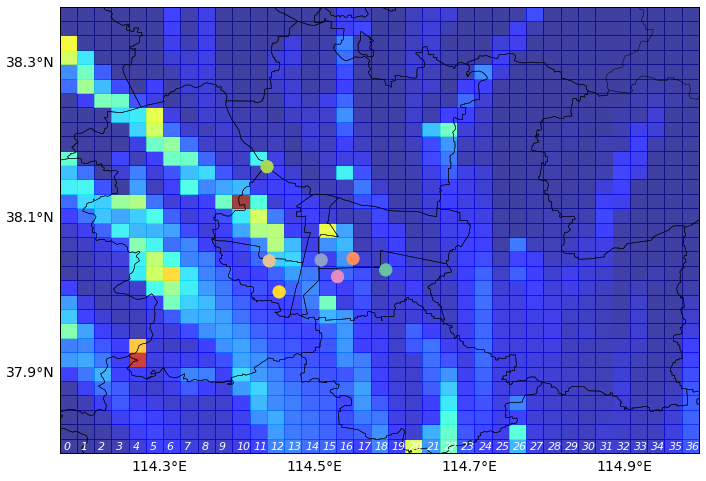

In [160]:
fig=plt.figure(figsize=(12,8))
ax=plt.subplot()

ax1 = plt.subplot(111)
lon_grid  = np.linspace(x_map1,x_map2,len(x_grid)+1)
lat_grid  = np.linspace(y_map1,y_map2,len(y_grid)+1)
xx,yy = np.meshgrid(lon_grid,lat_grid)

map = Basemap(llcrnrlon=x_map1,llcrnrlat=y_map1,urcrnrlon=x_map2,urcrnrlat=y_map2)
map.drawparallels(np.arange(y_map1+0.1035,y_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0,color= '#FFFFFF')
map.drawmeridians(np.arange(x_map1+0.128,x_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0)
map.readshapefile('/Users/HYF/Documents/SJZ/pre/sjz_xin/sjz_xin','sjz_xin',zorder =4)
p =plt.pcolor(xx,yy,dsu[294,:,:],cmap =plt.cm.jet,alpha =0.75,zorder =2)

cs=plt.cm.Set2(np.arange(7)/7.)
mslon,mslat = map(MS_xlon,MS_ylat)
map.scatter(mslon,mslat,s = 150,color = cs, zorder = 4)
for i in range(0,len(x_grid),1):
    plt.text(lon_grid[i]+0.005,lat_grid[0]+0.005,str(i),size = 11,color = "w",fontstyle = "italic",zorder =5)

### 1. 相关性矩阵

In [173]:
### 高新园区 化工学校 人民会堂 世纪公园 西北水源 西南高教 职工医院
## GX - 1
df1 = pd.DataFrame(dsite1_s)
df1.columns = ["GX"]
## HG - 2
df2 = pd.DataFrame(dsite2_s)
df2.columns = ["HG"]
## RM - 3
df3 = pd.DataFrame(dsite3_s)
df3.columns = ["RM"]
## SJ - 4
df4 = pd.DataFrame(dsite4_s)
df4.columns = ["SJ"]
## XB - 5
df5 = pd.DataFrame(dsite5_s)
df5.columns = ["XB"]
## XN - 6
df6 = pd.DataFrame(dsite6_s)
df6.columns = ["XN"]
## ZG - 7
df7 = pd.DataFrame(dsite7_s)
df7.columns = ["ZG"]

dsite_s  = pd.concat([df1, df2, df3, df4, df5, df6, df7], axis=1)

### 高新园区 化工学校 人民会堂 世纪公园 西北水源 西南高教 职工医院
## GX - 1
df1 = pd.DataFrame(dsite1_n)
df1.columns = ["GX"]
## HG - 2
df2 = pd.DataFrame(dsite2_n)
df2.columns = ["HG"]
## RM - 3
df3 = pd.DataFrame(dsite3_n)
df3.columns = ["RM"]
## SJ - 4
df4 = pd.DataFrame(dsite4_n)
df4.columns = ["SJ"]
## XB - 5
df5 = pd.DataFrame(dsite5_n)
df5.columns = ["XB"]
## XN - 6
df6 = pd.DataFrame(dsite6_n)
df6.columns = ["XN"]
## ZG - 7
df7 = pd.DataFrame(dsite7_n)
df7.columns = ["ZG"]

dsite_n  = pd.concat([df1, df2, df3, df4, df5, df6, df7], axis=1)

In [174]:
dsite_s.to_csv("./data/corr-so2.csv",index = False)
dsite_n.to_csv("./data/corr-no2.csv",index = False)

In [171]:
import pickle

my_data = {'a': [1, 2.0, 3, 4+6j],
           'b': ('string', u'Unicode string'),
           'c': None}
output = open('data.pkl', 'wb')
pickle.dump(my_data, output)
output.close()

In [172]:
import pprint, pickle

pkl_file = open('data.pkl', 'rb')

data1 = pickle.load(pkl_file)
pprint.pprint(data1)

pkl_file.close()

{'a': [1, 2.0, 3, (4+6j)], 'b': ('string', u'Unicode string'), 'c': None}


In [178]:
corr_s = dsite_s.corr().mul(100).astype(int)
corr_n = dsite_n.corr().mul(100).astype(int)

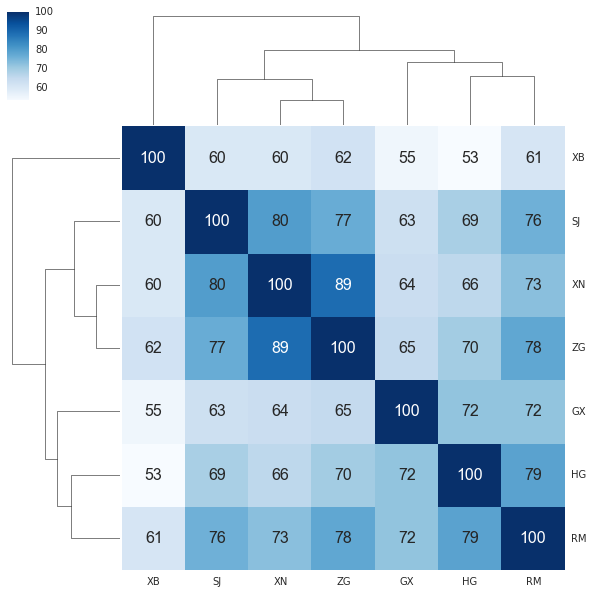

In [205]:
### SO2
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
sns.clustermap(data=corr_s, annot=True, fmt='d',cmap = "Blues",annot_kws={"size": 16},\
              ).savefig('./pic/0103/so2-cluster.pdf')

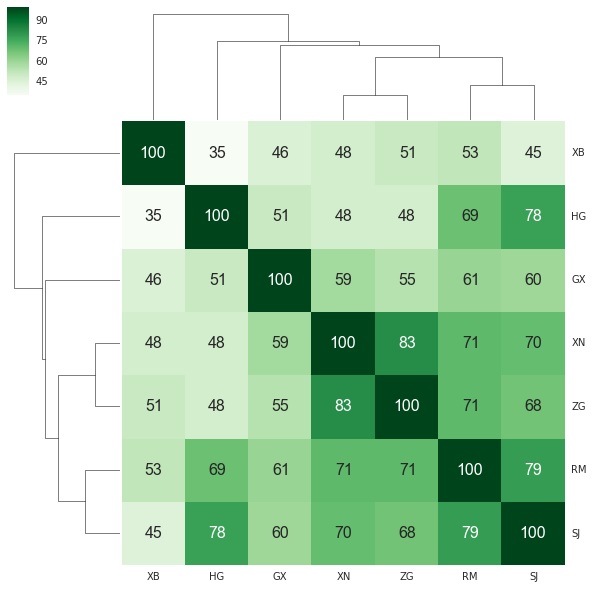

In [206]:
## NO2
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
sns.clustermap(data=corr_n, annot=True, fmt='d',cmap="Greens",annot_kws={"size": 16},\
              ).savefig('./pic/0103/no2-cluster.pdf')

### 2. 研究范围百分比表示法

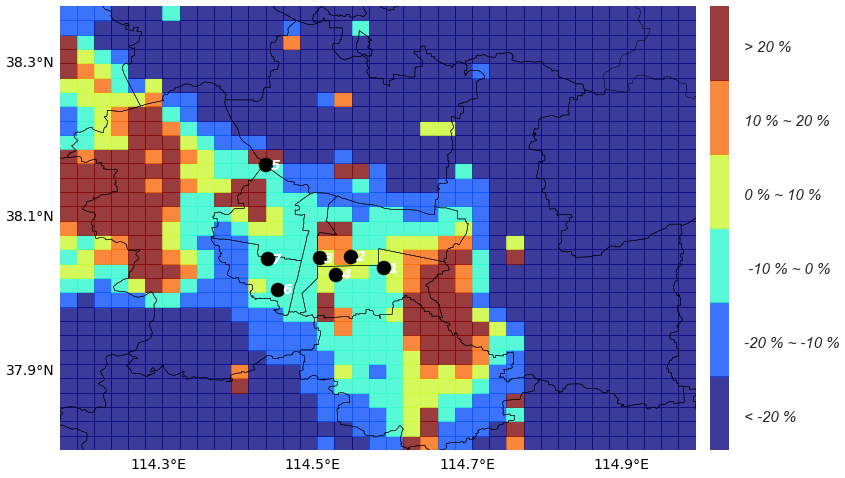

In [240]:
mean_so2 = dsite_s.mean().mean()
rank = np.zeros(31*37)
rank = rank.reshape(31,37)
so2_grid = dsu.mean(axis = 0)
for i in range(0,rank.shape[0],1):
    for j in range(0,rank.shape[1],1):
        ###  > 10%
        if so2_grid[i,j] >= mean_so2*1.2:
            rank[i,j]=5
        if (so2_grid[i,j] >= mean_so2*1.1) & (so2_grid[i,j] < mean_so2*1.2):
            rank[i,j]=4
        if (so2_grid[i,j] >= mean_so2*1.0) & (so2_grid[i,j] < mean_so2*1.1):
            rank[i,j]=3
        if (so2_grid[i,j] >= mean_so2*0.9) & (so2_grid[i,j] < mean_so2*1.0):
            rank[i,j]=2
        if (so2_grid[i,j] >= mean_so2*0.8) & (so2_grid[i,j] < mean_so2*0.9):
            rank[i,j]=1
        if (so2_grid[i,j] < mean_so2*0.8):
            rank[i,j] = 0
fig=plt.figure(figsize=(12,8))
ax = plt.gca()
map = Basemap(llcrnrlon=x_map1,llcrnrlat=y_map1,urcrnrlon=x_map2,urcrnrlat=y_map2)
map.drawparallels(np.arange(y_map1+0.1035,y_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0,color= '#FFFFFF')
map.drawmeridians(np.arange(x_map1+0.128,x_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0)
map.readshapefile('/Users/HYF/Documents/SJZ/pre/sjz_xin/sjz_xin','sjz_xin',zorder =4)
lon_grid  = np.linspace(x_map1,x_map2,len(x_grid)+1)
lat_grid  = np.linspace(y_map1,y_map2,len(y_grid)+1)
xx,yy = np.meshgrid(lon_grid,lat_grid)

cMap = plt.cm.get_cmap("jet",lut=6)
p =plt.pcolor(xx,yy,rank,cmap  = cMap,alpha =0.75,zorder =3)

mslon,mslat = map(MS_xlon,MS_ylat)

map.scatter(mslon,mslat,s = 800,marker = ".",color ="k", zorder = 4)
for i in range(0,7,1):
    plt.text(mslon[i]+0.006,mslat[i]-0.005,str(i+1),size = 14,color = "w",fontstyle = "italic",fontweight = "bold",zorder =4)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
cbar = plt.colorbar(p, ticks = [],cax=cax)    
list = ["< -20 %","-20 % ~ -10 %"," -10 % ~ 0 %","0 % ~ 10 %","10 % ~ 20 %","> 20 %"]
k = -0.1
for i in range(0,6,1):
    k = k + 1/6.0
    ax.annotate(list[i],xycoords='axes fraction',xy=(1.075,k),fontsize = 15, fontstyle = 'italic',zorder =3)
    
plt.savefig("./pic/0103/so2点位-10%.pdf")

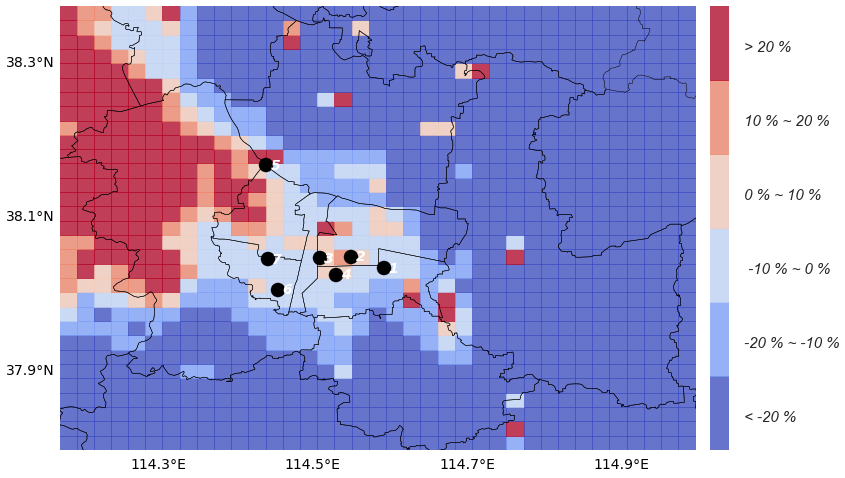

In [238]:
mean_no2 = dsite_n.mean().mean()
rank = np.zeros(31*37)
rank = rank.reshape(31,37)
no2_grid = dnu.mean(axis = 0)
for i in range(0,rank.shape[0],1):
    for j in range(0,rank.shape[1],1):
        ###  > 10%
        if no2_grid[i,j] >= mean_no2*1.2:
            rank[i,j]=5
        if (no2_grid[i,j] >= mean_no2*1.1) & (no2_grid[i,j] < mean_no2*1.2):
            rank[i,j]=4
        if (no2_grid[i,j] >= mean_no2*1.0) & (no2_grid[i,j] < mean_no2*1.1):
            rank[i,j]=3
        if (no2_grid[i,j] >= mean_no2*0.9) & (no2_grid[i,j] < mean_no2*1.0):
            rank[i,j]=2
        if (no2_grid[i,j] >= mean_no2*0.8) & (no2_grid[i,j] < mean_no2*0.9):
            rank[i,j]=1
        if (no2_grid[i,j] < mean_no2*0.8):
            rank[i,j] = 0
            
            
fig=plt.figure(figsize=(12,8))
ax = plt.gca()
map = Basemap(llcrnrlon=x_map1,llcrnrlat=y_map1,urcrnrlon=x_map2,urcrnrlat=y_map2)
map.drawparallels(np.arange(y_map1+0.1035,y_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0,color= '#FFFFFF')
map.drawmeridians(np.arange(x_map1+0.128,x_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0)
map.readshapefile('/Users/HYF/Documents/SJZ/pre/sjz_xin/sjz_xin','sjz_xin',zorder =4)
lon_grid  = np.linspace(x_map1,x_map2,len(x_grid)+1)
lat_grid  = np.linspace(y_map1,y_map2,len(y_grid)+1)
xx,yy = np.meshgrid(lon_grid,lat_grid)

cMap = plt.cm.get_cmap("coolwarm",lut=6)
p =plt.pcolor(xx,yy,rank,cmap  = cMap,alpha =0.75,zorder =3)

mslon,mslat = map(MS_xlon,MS_ylat)

map.scatter(mslon,mslat,s = 800,marker = ".",color ="k", zorder = 4)
for i in range(0,7,1):
    plt.text(mslon[i]+0.006,mslat[i]-0.005,str(i+1),size = 14,color = "w",fontstyle = "italic",fontweight = "bold",zorder =4)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
cbar = plt.colorbar(p, ticks = [],cax=cax)    
list = ["< -20 %","-20 % ~ -10 %"," -10 % ~ 0 %","0 % ~ 10 %","10 % ~ 20 %","> 20 %"]
k = -0.1
for i in range(0,6,1):
    k = k + 1/6.0
    ax.annotate(list[i],xycoords='axes fraction',xy=(1.075,k),fontsize = 15, fontstyle = 'italic',zorder =3)

plt.savefig("./pic/0103/no2点位-10%.pdf")

In [226]:
def adjust_spines(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward',0 ))  # outward by 10 points
            spine.set_smart_bounds(False)
        else:
            spine.set_color('none')  # don't draw spine

    # turn off ticks where there is no spine
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        # no yaxis ticks
        ax.yaxis.set_ticks([])

    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
        # no xaxis ticks
        ax.xaxis.set_ticks([])

In [227]:
site = ["HG","ZG","RM","GX","XB","XN","SJ"]
type = ["Simulation","Observation"]
so2_sim = [(s1.hg_so2.mean() + s2.hg_so2.mean() + s3.hg_so2.mean() + s4.hg_so2.mean())/4.0,
 (s1.zg_so2.mean() + s2.zg_so2.mean() + s3.zg_so2.mean() + s4.zg_so2.mean())/4.0,
 (s1.rm_so2.mean() + s2.rm_so2.mean() + s3.rm_so2.mean() + s4.rm_so2.mean())/4.0,
 (s1.gx_so2.mean() + s2.gx_so2.mean() + s3.gx_so2.mean() + s4.gx_so2.mean())/4.0,
 (s1.xb_so2.mean() + s2.xb_so2.mean() + s3.xb_so2.mean() + s4.xb_so2.mean())/4.0,
 (s1.xn_so2.mean() + s2.xn_so2.mean() + s3.xn_so2.mean() + s4.xn_so2.mean())/4.0,
 (s1.sj_so2.mean() + s2.sj_so2.mean() + s3.sj_so2.mean() + s4.sj_so2.mean())/4.0,
 ]

so2_true = [(f1.hg_so2.mean() + f2.hg_so2.mean() + f3.hg_so2.mean() + f4.hg_so2.mean())/4.0,
 (f1.zg_so2.mean() + f2.zg_so2.mean() + f3.zg_so2.mean() + f4.zg_so2.mean())/4.0,
 (f1.rm_so2.mean() + f2.rm_so2.mean() + f3.rm_so2.mean() + f4.rm_so2.mean())/4.0,
 (f1.gx_so2.mean() + f2.gx_so2.mean() + f3.gx_so2.mean() + f4.gx_so2.mean())/4.0,
 (f1.xb_so2.mean() + f2.xb_so2.mean() + f3.xb_so2.mean() + f4.xb_so2.mean())/4.0,
 (f1.xn_so2.mean() + f2.xn_so2.mean() + f3.xn_so2.mean() + f4.xn_so2.mean())/4.0,
 (f1.sj_so2.mean() + f2.sj_so2.mean() + f3.sj_so2.mean() + f4.sj_so2.mean())/4.0,
 ]

[ 66.14808557  58.89637372  66.81860382  70.10556838  74.43397416
  82.47027853  75.80017367]
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]


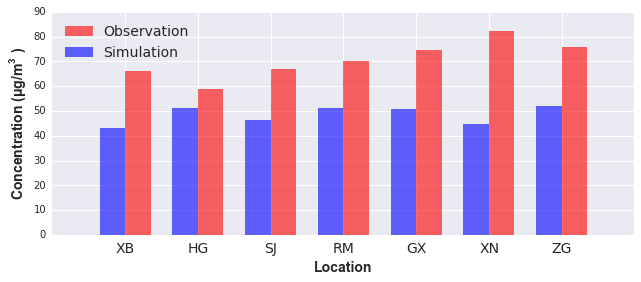

In [234]:
dpoints = np.array([[type[0], site[0], so2_sim[0] ], ### SO2 ###
                    [type[0], site[1], so2_sim[1]],
                    [type[0], site[2], so2_sim[2]],
                    [type[0], site[3], so2_sim[3]],
                    [type[0], site[4], so2_sim[4]],
                    [type[0], site[5], so2_sim[5]],
                    [type[0], site[6], so2_sim[6]],
                    [type[1], site[0], so2_true[0]], ### NO2 ###
                    [type[1], site[1], so2_true[1]],
                    [type[1], site[2], so2_true[2]],
                    [type[1], site[3], so2_true[3]],
                    [type[1], site[4], so2_true[4]],
                    [type[1], site[5], so2_true[5]],
                    [type[1], site[6], so2_true[6]]])
fig = plt.figure(figsize=(9,4))
ax = fig.add_subplot(111)

def barplot(ax, dpoints):
    '''
    Create a barchart for data across different categories with
    multiple conditions for each category.
    
    @param ax: The plotting axes from matplotlib.
    @param dpoints: The data set as an (n, 3) numpy array
    '''
    
    # Aggregate the conditions and the categories according to their
    # mean values
    conditions = [(c, np.mean(dpoints[dpoints[:,0] == c][:,2].astype(float))) 
                  for c in np.unique(dpoints[:,0])]
    categories = [(c, np.mean(dpoints[dpoints[:,1] == c][:,2].astype(float))) 
                  for c in np.unique(dpoints[:,1])]
    
    # sort the conditions, categories and data so that the bars in
    # the plot will be ordered by category and condition
    conditions = [c[0] for c in sorted(conditions, key=o.itemgetter(1))]
    categories = [c[0] for c in sorted(categories, key=o.itemgetter(1))]
    
    dpoints = np.array(sorted(dpoints, key=lambda x: categories.index(x[1])))

# the space between each set of bars
    space = 0.3
    n = len(conditions)
    width = (1 - space) / (len(conditions))
    
    # Create a set of bars at each position
    for i,cond in enumerate(conditions):
        indeces = range(1, len(categories)+1)
        vals = dpoints[dpoints[:,0] == cond][:,2].astype(np.float)
        pos = [j - (1 - space) / 2. + i * width for j in indeces]
        #pos1 = [pos[0],pos[3],pos[2],pos[1]]
        #val1 =  [vals[3],vals[0],vals[1],vals[2]]
        #ls = [1.0,2.0,3.0,4.0]
        ax.bar(pos, vals, width=width, label =cond,lw = 0,color=  ["blue","r"][i],alpha = 0.6)
              # color=  ["#EFCECE","#97B58A"][i])#cm.Set3(float(i) / n))
    
    # Set the x-axis tick labels to be equal to the categories
    ax.set_xticks(indeces)
    ax.set_xticklabels(categories)
    plt.setp(plt.xticks()[1], rotation=0,fontweight = 'bold',fontsize = 12)
    print vals
    print pos
    # Add the axis labels
    ax.set_ylabel(r'$\mathregular{ Concentration\ (\mu g/m^3)}$',fontweight = "bold",fontsize =14)
    ax.set_xlabel("Location",fontweight = "bold",fontsize =14)
    ax
    
    # Add a legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], loc='upper left',frameon =False,fontsize =14)
        
barplot(ax, dpoints)
adjust_spines(ax, ['left', 'bottom'])
ax.set_xticklabels( ["XB","HG","SJ","RM","GX","XN","ZG"],fontsize = 14)
plt.tight_layout()
plt.savefig("./pic/0103//SO2-站点比较.pdf")
plt.show()

[ 53.17961004  50.59398804  58.264179    60.6084117   59.44052802
  59.83414452  63.1076797 ]
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]


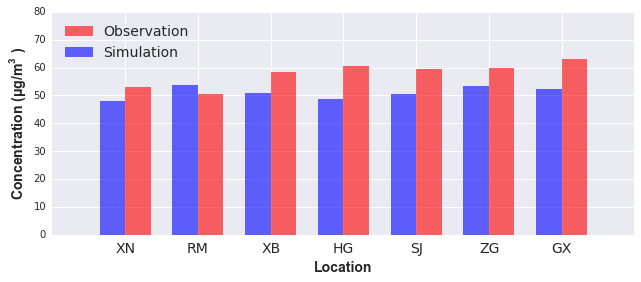

In [237]:
site = ["HG","ZG","RM","GX","XB","XN","SJ"]
type = ["Simulation","Observation"]
no2_sim = [(s1.hg_no2.mean() + s2.hg_no2.mean() + s3.hg_no2.mean() + s4.hg_no2.mean())/4.0,
 (s1.zg_no2.mean() + s2.zg_no2.mean() + s3.zg_no2.mean() + s4.zg_no2.mean())/4.0,
 (s1.rm_no2.mean() + s2.rm_no2.mean() + s3.rm_no2.mean() + s4.rm_no2.mean())/4.0,
 (s1.gx_no2.mean() + s2.gx_no2.mean() + s3.gx_no2.mean() + s4.gx_no2.mean())/4.0,
 (s1.xb_no2.mean() + s2.xb_no2.mean() + s3.xb_no2.mean() + s4.xb_no2.mean())/4.0,
 (s1.xn_no2.mean() + s2.xn_no2.mean() + s3.xn_no2.mean() + s4.xn_no2.mean())/4.0,
 (s1.sj_no2.mean() + s2.sj_no2.mean() + s3.sj_no2.mean() + s4.sj_no2.mean())/4.0,
 ]

no2_true = [(f1.hg_no2.mean() + f2.hg_no2.mean() + f3.hg_no2.mean() + f4.hg_no2.mean())/4.0,
 (f1.zg_no2.mean() + f2.zg_no2.mean() + f3.zg_no2.mean() + f4.zg_no2.mean())/4.0,
 (f1.rm_no2.mean() + f2.rm_no2.mean() + f3.rm_no2.mean() + f4.rm_no2.mean())/4.0,
 (f1.gx_no2.mean() + f2.gx_no2.mean() + f3.gx_no2.mean() + f4.gx_no2.mean())/4.0,
 (f1.xb_no2.mean() + f2.xb_no2.mean() + f3.xb_no2.mean() + f4.xb_no2.mean())/4.0,
 (f1.xn_no2.mean() + f2.xn_no2.mean() + f3.xn_no2.mean() + f4.xn_no2.mean())/4.0,
 (f1.sj_no2.mean() + f2.sj_no2.mean() + f3.sj_no2.mean() + f4.sj_no2.mean())/4.0,
 ]
dpoints = np.array([[type[0], site[0], no2_sim[0] ], ### no2 ###
                    [type[0], site[1], no2_sim[1]],
                    [type[0], site[2], no2_sim[2]],
                    [type[0], site[3], no2_sim[3]],
                    [type[0], site[4], no2_sim[4]],
                    [type[0], site[5], no2_sim[5]],
                    [type[0], site[6], no2_sim[6]],
                    [type[1], site[0], no2_true[0]], ### NO2 ###
                    [type[1], site[1], no2_true[1]],
                    [type[1], site[2], no2_true[2]],
                    [type[1], site[3], no2_true[3]],
                    [type[1], site[4], no2_true[4]],
                    [type[1], site[5], no2_true[5]],
                    [type[1], site[6], no2_true[6]]])
fig = plt.figure(figsize=(9,4))
ax = fig.add_subplot(111)

def barplot(ax, dpoints):
    '''
    Create a barchart for data across different categories with
    multiple conditions for each category.
    
    @param ax: The plotting axes from matplotlib.
    @param dpoints: The data set as an (n, 3) numpy array
    '''
    
    # Aggregate the conditions and the categories according to their
    # mean values
    conditions = [(c, np.mean(dpoints[dpoints[:,0] == c][:,2].astype(float))) 
                  for c in np.unique(dpoints[:,0])]
    categories = [(c, np.mean(dpoints[dpoints[:,1] == c][:,2].astype(float))) 
                  for c in np.unique(dpoints[:,1])]
    
    # sort the conditions, categories and data so that the bars in
    # the plot will be ordered by category and condition
    conditions = [c[0] for c in sorted(conditions, key=o.itemgetter(1))]
    categories = [c[0] for c in sorted(categories, key=o.itemgetter(1))]
    
    dpoints = np.array(sorted(dpoints, key=lambda x: categories.index(x[1])))

# the space between each set of bars
    space = 0.3
    n = len(conditions)
    width = (1 - space) / (len(conditions))
    
    # Create a set of bars at each position
    for i,cond in enumerate(conditions):
        indeces = range(1, len(categories)+1)
        vals = dpoints[dpoints[:,0] == cond][:,2].astype(np.float)
        pos = [j - (1 - space) / 2. + i * width for j in indeces]
        #pos1 = [pos[0],pos[3],pos[2],pos[1]]
        #val1 =  [vals[3],vals[0],vals[1],vals[2]]
        #ls = [1.0,2.0,3.0,4.0]
        ax.bar(pos, vals, width=width, label =cond,lw = 0,color=  ["blue","r"][i],alpha = 0.6)
              # color=  ["#EFCECE","#97B58A"][i])#cm.Set3(float(i) / n))
    
    # Set the x-axis tick labels to be equal to the categories
    ax.set_xticks(indeces)
    ax.set_xticklabels(categories)
    plt.setp(plt.xticks()[1], rotation=0,fontweight = 'bold',fontsize = 12)
    print vals
    print pos
    # Add the axis labels
    ax.set_ylabel(r'$\mathregular{ Concentration\ (\mu g/m^3)}$',fontweight = "bold",fontsize =14)
    ax.set_xlabel("Location",fontweight = "bold",fontsize =14)
    ax.set_ylim(0,80)
    
    # Add a legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], loc='upper left',frameon =False,fontsize =14)
        
barplot(ax, dpoints)
adjust_spines(ax, ['left', 'bottom'])
ax.set_xticklabels( ["XN","RM","XB","HG","SJ","ZG","GX"],fontsize = 14)
plt.tight_layout()
plt.savefig("./pic/0103//no2-站点比较.pdf")
plt.show()